In [ ]:
# default_exp datasets
from nbdev.showdoc import *
%load_ext autoreload
%autoreload 2
import numpy as np

## Make Circle and Swiss Roll Datasets

## Create Circle Dataset

We write a function that generate a 1-manifold circumference of a circle in 3 dimensions.

In [ ]:
# export
import torch
def xy_tilt(X, flow, labels, xtilt=0, ytilt=0):
  xrotate = np.array([[1,              0,             0],
                      [0,  np.cos(xtilt), np.sin(xtilt)],
                      [0, -np.sin(xtilt), np.cos(xtilt)]])
  X = X @ xrotate
  flow = flow @ xrotate
  yrotate = np.array([[np.cos(ytilt), 0, -np.sin(ytilt)],
                      [            0, 1,              0],
                      [np.sin(ytilt), 0,  np.cos(ytilt)]])
  X = X @ yrotate
  flow = flow @ yrotate
  return X, flow, labels

In [ ]:
# export
import numpy as np

def directed_circle(num_nodes=100, radius=1, xtilt=0, ytilt=0, twodim=False):
  # sample random angles between 0 and 2pi
  thetas = np.random.uniform(0, 2*np.pi, num_nodes)
  thetas = np.sort(thetas)
  labels = thetas
  # calculate x and y coordinates
  x = np.cos(thetas) * radius
  y = np.sin(thetas) * radius
  z = np.zeros(num_nodes)
  X = np.column_stack((x, y, z))
  # calculate the angle of the tangent
  alphas = thetas + np.pi/2
  # calculate the coordinates of the tangent
  u = np.cos(alphas)
  v = np.sin(alphas)
  w = np.zeros(num_nodes)
  flow = np.column_stack((u, v, w))
  # tilt 
  X, flow, labels = xy_tilt(X, flow, labels, xtilt=xtilt, ytilt=ytilt)
  if twodim:
    X = X[:,:2]
    flow = flow[:,:2]
  return X, flow, labels

In [ ]:
# export
import matplotlib.pyplot as plt

def plot_directed_2d(X, flow, labels, mask_prob=0.5):
  num_nodes = X.shape[0]
  fig = plt.figure()
  ax = fig.add_subplot()
  ax.scatter(X[:,0], X[:,1], marker=".", c=labels)
  mask = np.random.rand(num_nodes) > mask_prob
  ax.quiver(X[mask,0], X[mask,1], flow[mask,0], flow[mask,1], alpha=0.1)
  ax.set_aspect("equal")
  plt.show()

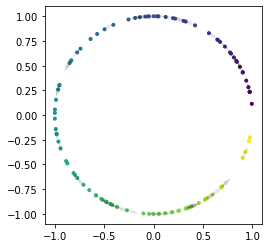

In [ ]:
X, flow, labels = directed_circle(num_nodes=100, radius=1)
plot_directed_2d(X, flow, labels)

Now, let lift this into 3 dimensions

In [ ]:
# export
def plot_origin_3d(ax, xlim, ylim, zlim):
  ax.plot(xlim,[0,0],[0,0], color="k", alpha=0.5)
  ax.plot([0,0],ylim,[0,0], color="k", alpha=0.5)
  ax.plot([0,0],[0,0],zlim, color="k", alpha=0.5)

def plot_directed_3d(X, flow, labels, mask_prob=0.5, origin=False):
  num_nodes = X.shape[0]
  colors = plt.cm.viridis(labels/(2*np.pi))
  mask = np.random.rand(num_nodes) > mask_prob
  fig = plt.figure()
  ax = fig.add_subplot(projection='3d')
  if origin:
    plot_origin_3d(ax, xlim=[X[:,0].min(),X[:,0].max()], ylim=[X[:,1].min(),X[:,1].max()], zlim=[X[:,2].min(),X[:,2].max()])
  ax.scatter(X[:,0], X[:,1], X[:,2], marker=".", c=labels)
  ax.quiver(X[mask,0], X[mask,1], X[mask,2], flow[mask,0], flow[mask,1], flow[mask,2], alpha=0.1, length=0.5)
  plt.show()

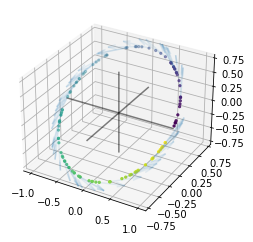

In [ ]:
X, flow, labels = directed_circle(num_nodes=100, radius=1, xtilt=np.pi/4)
plot_directed_3d(X, flow, labels, mask_prob=0.5, origin=True)

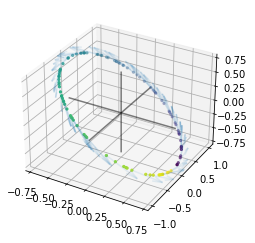

In [ ]:
X, flow, labels = directed_circle(num_nodes=100, radius=1, ytilt=np.pi/4)
plot_directed_3d(X, flow, labels, mask_prob=0.5, origin=True)

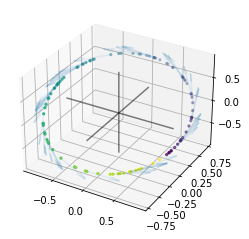

In [ ]:
X, flow, labels = directed_circle(num_nodes=100, radius=1, xtilt=np.pi/4, ytilt=np.pi/4)
plot_directed_3d(X, flow, labels, origin=True)

Let extend this further to a 2-manifold cylinder with direction.

In [ ]:
# export
def directed_prism(X, flow, labels, height=10):
  num_nodes = X.shape[0]
  z_noise = np.random.uniform(-height/2, height/2, num_nodes)
  X[:,2] = X[:,2] + z_noise
  return X, flow, labels

In [ ]:
# export
def directed_cylinder(num_nodes=1000, radius=1, height=10, xtilt=0, ytilt=0):
  X, flow, labels = directed_circle(num_nodes, radius, xtilt, ytilt)
  X, flow, labels = directed_prism(X, flow, labels, height)
  return X, flow, labels

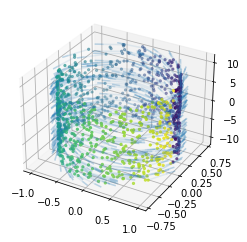

In [ ]:
X, flow, labels = directed_cylinder(num_nodes=1000, radius=1, height=20, xtilt=np.pi/4, ytilt=0)
plot_directed_3d(X, flow, labels, mask_prob=0.5)

## Swiss roll

Similarly, we can generate a swiss roll and a 

In [ ]:
# export
def directed_spiral(num_nodes=100, num_spirals=2.5, radius=1, xtilt=0, ytilt=0):
  # sample random angles between 0 and num_spirals * 2pi
  thetas = np.random.uniform(0, num_spirals*2*np.pi, num_nodes)
  thetas = np.sort(thetas)
  labels = thetas
  # calculate x and y coordinates
  x = np.cos(thetas) * thetas * radius
  y = np.sin(thetas) * thetas * radius
  z = np.zeros(num_nodes)
  X = np.column_stack((x, y, z))
  # calculate the angle of the tangent
  alphas = thetas + np.pi/2
  # calculate the coordinates of the tangent
  u = np.cos(alphas) * thetas
  v = np.sin(alphas) * thetas
  w = np.zeros(num_nodes)
  flow = np.column_stack((u, v, w))
  # tilt 
  X, flow, labels = xy_tilt(X, flow, labels, xtilt, ytilt)
  return X, flow, labels

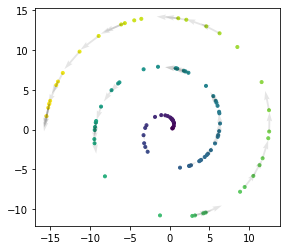

In [ ]:
X, flow, labels = directed_spiral(num_nodes=100, num_spirals=2.5, radius=1)
plot_directed_2d(X, flow, labels)

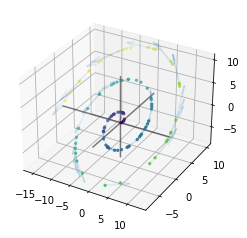

In [ ]:
X, flow, labels = directed_spiral(num_nodes=100, num_spirals=2.5, radius=1, xtilt=np.pi/4)
plot_directed_3d(X, flow, labels, mask_prob=0.5, origin=True)

In [ ]:
# export
def directed_swiss_roll(num_nodes=1000, num_spirals=2.5, radius=1, height=10, xtilt=0, ytilt=0):
  X, flow, labels = directed_spiral(num_nodes, num_spirals, radius, xtilt, ytilt)
  X, flow, labels = directed_prism(X, flow, labels, height)
  return X, flow, labels

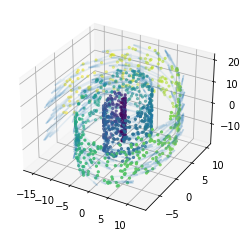

In [ ]:
X, flow, labels = directed_swiss_roll(num_nodes=1000, num_spirals=2.5, radius=1, height=20, xtilt=np.pi/4, ytilt=0)
plot_directed_3d(X, flow, labels, mask_prob=0.5)

In [ ]:
# export 
def directed_spiral_uniform(num_nodes=100, num_spirals=2.5, radius=1, xtilt=0, ytilt=0):
  # sample random angles between 0 and num_spirals * 2pi
  t1 = np.random.uniform(0, num_spirals*2*np.pi, num_nodes)
  t2 = np.random.uniform(0, num_spirals*2*np.pi, num_nodes)
  thetas = np.maximum(t1, t2)
  thetas = np.sort(thetas)
  labels = thetas
  # calculate x and y coordinates
  x = np.cos(thetas) * thetas * radius
  y = np.sin(thetas) * thetas * radius
  z = np.zeros(num_nodes)
  X = np.column_stack((x, y, z))
  # calculate the angle of the tangent
  alphas = thetas + np.pi/2
  # calculate the coordinates of the tangent
  u = np.cos(alphas)
  v = np.sin(alphas)
  w = np.zeros(num_nodes)
  flow = np.column_stack((u, v, w))
  # tilt 
  X, flow, labels = xy_tilt(X, flow, labels, xtilt, ytilt)
  return X, flow, labels

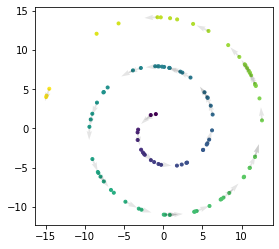

In [ ]:
X, flow, labels = directed_spiral_uniform(num_nodes=100, num_spirals=2.5, radius=1)
plot_directed_2d(X, flow, labels)

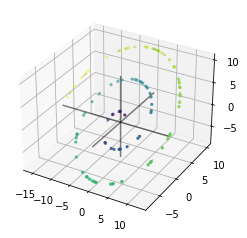

In [ ]:
X, flow, labels = directed_spiral_uniform(num_nodes=100, num_spirals=2.5, radius=1, xtilt=np.pi/4)
plot_directed_3d(X, flow, labels, mask_prob=0.5, origin=True)

In [ ]:
# export
def directed_swiss_roll_uniform(num_nodes=1000, num_spirals=2.5, radius=1, height=10, xtilt=0, ytilt=0):
  X, flow, labels = directed_spiral_uniform(num_nodes, num_spirals, radius, xtilt, ytilt)
  X, flow, labels = directed_prism(X, flow, labels, height)
  return X, flow, labels

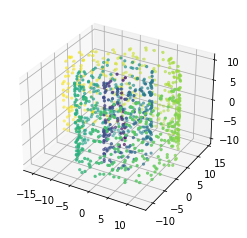

In [ ]:
X, flow, labels = directed_swiss_roll_uniform(num_nodes=1000, num_spirals=2.5, radius=1, height=20, xtilt=0, ytilt=0)
plot_directed_3d(X, flow, labels, mask_prob=0.5)

In [ ]:
# export
import numpy as np
import matplotlib.pyplot as plt
def directed_swiss_roll_sklearn(num_nodes = 1000, num_spirals = 1.5, radius = 1, height = 21, noise = 0, xtilt = 0, ytilt = 0):
  t = num_spirals * np.pi * (1 + 2*np.random.rand(num_nodes))
  t = np.sort(t)
  z = height * np.random.rand(num_nodes)
  x = t * np.cos(t) * radius
  y = t * np.sin(t) * radius
  X = np.vstack((x,y,z))
  X += noise * np.random.randn(3,num_nodes)
  X = X.T
  t = np.squeeze(t)
  # generate vector field on roll
  # calculate the angle of the tangent
  alphas = t + np.pi/2
  u = np.cos(alphas) * t
  v = np.sin(alphas) * t
  w = np.zeros(num_nodes)
  flows = np.column_stack((u,v,w))
  # tilt 
  X, flows, labels = xy_tilt(X, flows, t, xtilt, ytilt)
  return X, flows, labels

In [ ]:
from directed_graphs.datasets import directed_swiss_roll_uniform, directed_swiss_roll, directed_swiss_roll_sklearn, plot_directed_3d

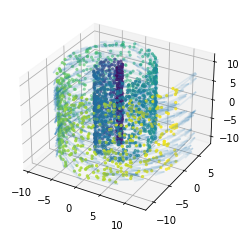

In [ ]:
X, flow, labels = directed_swiss_roll(num_nodes=2000, num_spirals=2, radius=1, height=21, xtilt=0, ytilt=0)
plot_directed_3d(X, flow, labels, mask_prob=0.5)

using sigma =  2.577337359070377


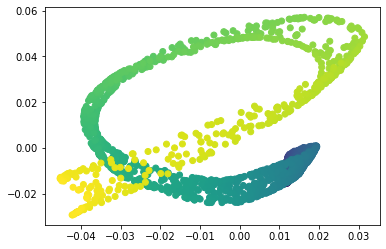

In [ ]:
k = 25
Dists = distance_matrix(X)
sigma = np.median(np.partition(Dists,k)[:,k])
print("using sigma = ",sigma)
diff_map = diffusion_map_from_points(X,sigma=sigma)
plt.scatter(diff_map[:,0],diff_map[:,1],c=labels)

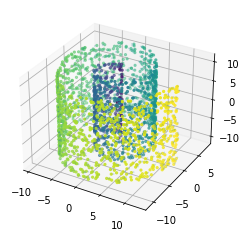

In [ ]:
X, flow, labels = directed_swiss_roll_uniform(num_nodes=2000, num_spirals=2, radius=1, height=21, xtilt=0, ytilt=0)
plot_directed_3d(X, flow, labels, mask_prob=0.5)

using sigma =  2.364483302400914


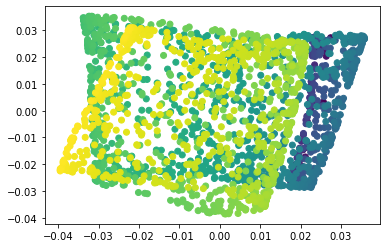

In [ ]:
k = 20
Dists = distance_matrix(X)
sigma = np.median(np.partition(Dists,k)[:,k])
print("using sigma = ",sigma)
diff_map = diffusion_map_from_points(X,sigma=sigma)
plt.scatter(diff_map[:,0],diff_map[:,1],c=labels)

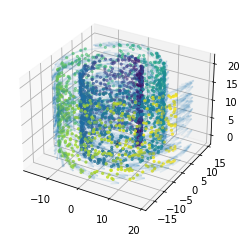

In [ ]:
X, flow, labels = directed_swiss_roll_sklearn(num_nodes=2000, num_spirals=2, radius=1, height=21, xtilt=0, ytilt=0)
plot_directed_3d(X, flow, labels, mask_prob=0.5)

using sigma =  2.1339021546070156


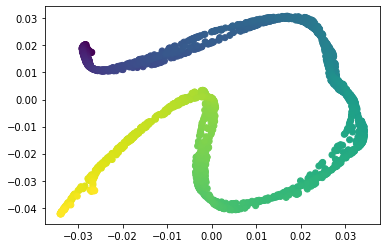

In [ ]:
k = 9
Dists = distance_matrix(X)
sigma = np.median(np.partition(Dists,k)[:,k])
print("using sigma = ",sigma)
diff_map = diffusion_map_from_points(X,sigma=sigma)
plt.scatter(diff_map[:,0],diff_map[:,1],c=labels)